In [17]:
x = [[False, False, False], [True, True, False]]
y = [[True, True, False], [False, True, False]]

#print np.bitwise_or(x, y)

a = [[True, True, True], 
     [True, True, True]]

print 

[[True, True, True], [True, True, True]]


In [18]:
b = np.lib.pad(a, ((2,4),(3,1)), 'constant', constant_values=0)
print b
print b[2][2]

[[False False False False False False False]
 [False False False False False False False]
 [False False False  True  True  True False]
 [False False False  True  True  True False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]
False


In [52]:
a = [1.,]

In [53]:
a.append(5)


In [54]:
print a

[1.0, 5]


In [3]:
# reg import

import sys

from astropy.io import fits
import numpy as np
#from fil_finder import fil_finder_2D

import matplotlib
import matplotlib.pyplot as plt

import astropy.units as u #currently not used        

%matplotlib inline

/Users/larryli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
sys.path.append('/Users/larryli/Documents/CC/16-17/research/GALFA_filfind/fil_finder')

import filfind_class as filfind

import mask_obj_node as maskNode

In [8]:
img, hdr = fits.getdata("../data/usharpbg30.fits", header=True)

original_img = img

# reduce to first slice
img = img[17,:,:]
print img.shape
#cut
#img = img[850:1120,2230:]
print img.shape

(1150, 2600)
(1150, 2600)


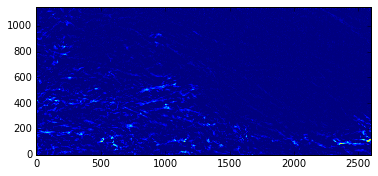

In [9]:
### vis slice
imgplot = plt.imshow(img, origin='lower')

In [10]:
filfind = reload(filfind)
fils = filfind.fil_finder_2D(img, header=hdr, beamwidth=10.0, distance = 100, glob_thresh=20, flatten_thresh=95,
                             standard_width=3, size_thresh=1000)

imgscale: 0.029089 (taken from the 3rd cdelt for GALFA cube)
standard_width: 3.000000


/Users/larryli/anaconda/lib/python2.7/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "
/Users/larryli/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


number of objects: 135


/Users/larryli/Documents/CC/16-17/research/GALFA_filfind/fil_finder/filfind_class.py:549: RuntimeWarning: invalid value encountered in less
  self.image[np.where((self.mask * self.image) < 0.0)] = 0


size_thresh is set to 1000 (magic: 1000)
adapt_thresh is set to 206 (magic: 100)
smooth_size is set to 51 (magic: 10)
fill_hole_size is set to 56.654502 (magic: 5.000000)


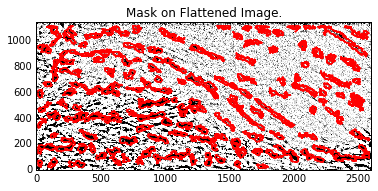

In [11]:
mask_objs = fils.create_mask(verbose=True, regrid=False, border_masking=True)#, output_mask_objs=True)
# note size_thresh, adapt_thresh, smooth_size, fill_hole_size can all be set by args

In [12]:
mask_objs = fils.create_mask(verbose=True, regrid=False, border_masking=True, output_mask_objs=True)

imgscale: 0.029089 (taken from the 3rd cdelt for GALFA cube)
standard_width: 3.000000
number of objects: 135


In [27]:
maskNode = reload(maskNode)

mask_node_list_27 = []
for i in range(0, len(mask_objs[0])):
    this_mask_node = maskNode.MaskObjNode(mask_objs[0][i], mask_objs[1][i],27)
    mask_node_list_27.append(this_mask_node)

In [28]:
type(mask_node_list_27[1].mask)

numpy.ndarray

In [29]:
'''
for i in range(0, len(mask_objs[0])):
    print np.where(mask_objs[0][i] == True)[0].shape
    print mask_objs[1][i]
'''

'\nfor i in range(0, len(mask_objs[0])):\n    print np.where(mask_objs[0][i] == True)[0].shape\n    print mask_objs[1][i]\n'

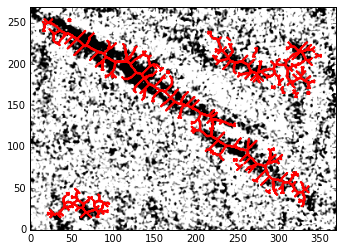

In [30]:
fils.medskel(verbose=True)

# slice 12-21 top right corner [850:1120,2230:]

In [13]:
# cut to small cube
img2 = original_img[12:21,850:1120,2230:]
print img.shape

(1150, 2600)


In [10]:
new_img = np.zeros((270,370))

for c in range(0, new_img.shape[0]):
    for r in range(0, new_img.shape[1]):
        intensity_sum = 0.0
        for v in range(0, 9):
            intensity_sum += img2[v,c,r]
        new_img[c,r] = intensity_sum

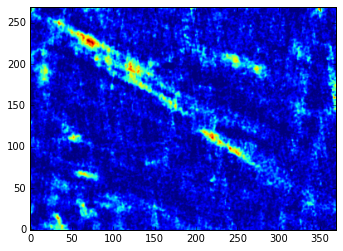

In [11]:
imgplot = plt.imshow(new_img, origin='lower')

In [16]:
new_cube = img2
print new_cube.shape
for x in range(0, new_cube.shape[0]):
    

IndentationError: expected an indented block (<ipython-input-16-0d289bd8df71>, line 4)

In [13]:
filfind = reload(filfind)
fils2 = filfind.fil_finder_2D(new_img, header=hdr, beamwidth=10.0, distance = 100, glob_thresh=20, flatten_thresh=95,
                             standard_width=1.1, size_thresh=1000)

imgscale: 0.029089 (taken from the 3rd cdelt for GALFA cube)
standard_width: 1.100000


/Users/larryli/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


number of objects: 4
size_thresh is set to 1000 (magic: 1000)
adapt_thresh is set to 200 (magic: 100)
smooth_size is set to 19 (magic: 10)
fill_hole_size is set to 56.654502 (magic: 5.000000)


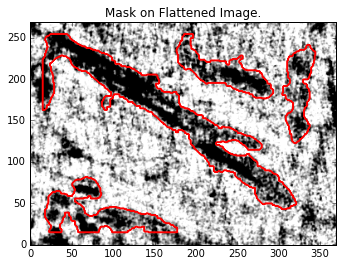

In [14]:
fils2.create_mask(verbose=True, regrid=False, border_masking=True, adapt_thresh=200)

In [15]:
mask_objs2 = fils2.create_mask(verbose=True, regrid=False, border_masking=True, output_mask_objs=True)

NameError: name 'fils2' is not defined

In [14]:
maskNode = reload(maskNode)

mask_node_list_12_21 = []
for i in range(0, len(mask_objs2[0])):
    this_mask_node = maskNode.MaskObjNode(mask_objs2[0][i], mask_objs2[1][i],27)
    mask_node_list_12_21.append(this_mask_node)

NameError: name 'mask_objs2' is not defined

In [17]:
#1 is the one we want = rerun
comb_mask = mask_node_list_12_21[1].expandMask([[0,0],[370, 270]])

In [18]:
fils3 = filfind.fil_finder_2D(new_img, header=hdr, beamwidth=10.0, distance = 100, glob_thresh=20, flatten_thresh=95,
                             standard_width=3, size_thresh=1000, mask = comb_mask)

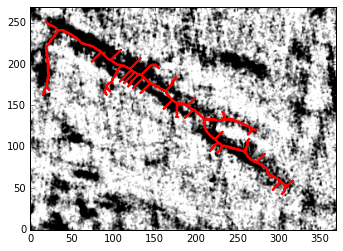

In [19]:
fils3.medskel(verbose=True)

Filament: 1 / 1


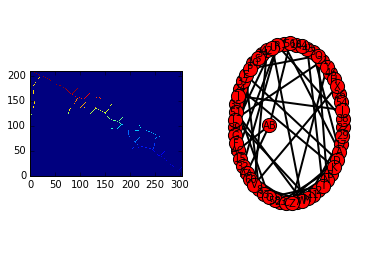

Filament: 1 / 1


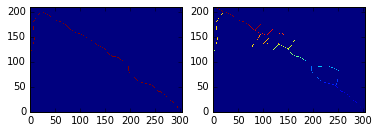

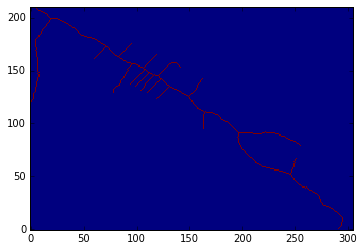

In [20]:
fils3.analyze_skeletons(verbose=True, skel_thresh=20.0)

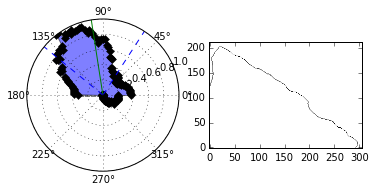

In [21]:
fils3.exec_rht(verbose=True)

0 in 1
Fit Parameters: [ 1.93694254  0.15777104  0.94285293  0.35038473] 
Fit Errors: [ 0.00713749  0.02531508  0.17130923  0.06320869]
Fit Type: gaussian


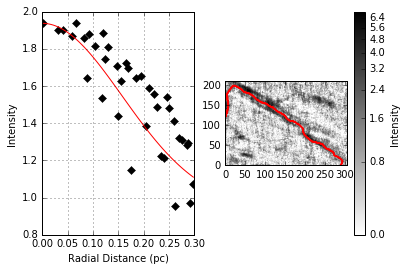

In [22]:
fils3.find_widths(verbose=True, use_longest_paths=True, auto_cut=False)

In [153]:
#fils.analyze_skeletons(verbose=True, skel_thresh=50.0)

In [154]:
#fils.exec_rht(verbose=True)

In [155]:
#fils.find_widths(verbose=True)